In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
dr=[drive_4km,drive_1km]
y_data=pd.read_excel(dr[0]+"y_coron_dir.xlsx",index_col=0)
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0)
x_data=x_data.iloc[:,0:9]
y_data=y_data[y_data>0]
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result["value"]

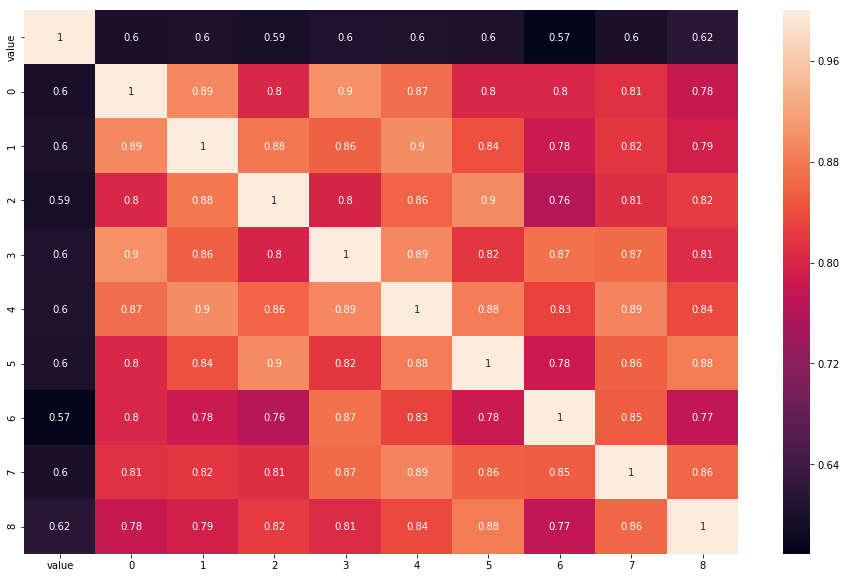

In [0]:
df2=pd.concat([y_data, x_data], axis=1)
plt.figure(figsize=(16, 10))
sns.heatmap(df2.corr(),annot=True)

<Figure size 1152x720 with 0 Axes>

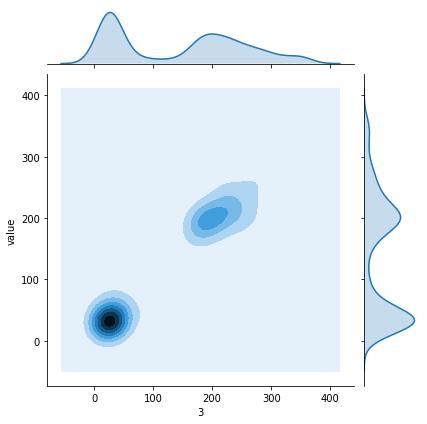

In [0]:
plt.figure(figsize=(16, 10))
ax=sns.jointplot("3", "value", data=df2, kind="kde",)

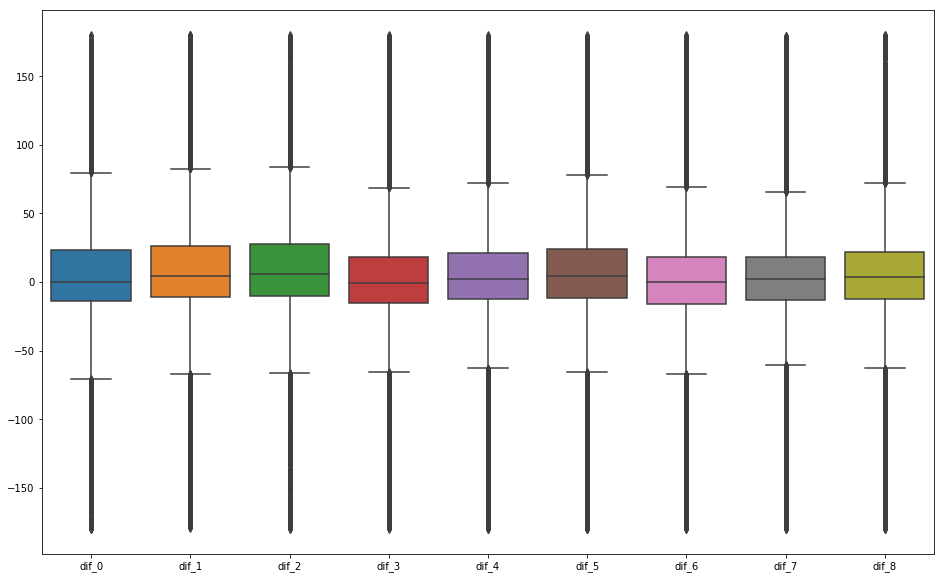

In [0]:
for column in df2.columns:
  df2["dif_"+column]=df2[column]-df2["value"]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]<180]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]>-180]
plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=df2.iloc[:,11:20])

In [0]:
df2.iloc[:,11:20].describe()

,dif_0,dif_1,dif_2,dif_3,dif_4,dif_5,dif_6,dif_7,dif_8
count,7894.000000,7914.000000,7913.000000,7929.000000,7929.000000,7921.000000,7840.000000,7912.000000,7961.000000
mean,5.861628,8.730716,9.956132,2.767658,4.938976,5.814530,2.222990,3.056732,4.252667
std,50.831209,49.558599,49.001364,50.645874,49.017728,49.094507,51.396370,48.614532,49.283478
min,-179.862000,-179.436455,-179.813946,-179.861431,-179.986177,-179.700638,-179.950232,-179.995739,-179.784533
25%,-14.130235,-10.948300,-9.865540,-15.101471,-12.469692,-11.825405,-15.956123,-13.068148,-12.055397
50%,-0.113924,4.407182,5.839127,-0.770462,2.144615,4.150818,-0.300079,2.295128,3.742231
75%,23.471779,26.509953,27.544434,18.556168,21.335358,24.092503,18.186388,18.519610,21.730988
max,179.736572,179.931488,179.970184,179.963531,179.680450,179.824127,179.929535,179.056046,179.932053


**Filter wind spd more than thershold**

In [0]:
y_data=pd.read_excel(dr[0]+"y_coron_dir.xlsx",index_col=0)
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0)
x_data=x_data.iloc[:,0:9]
y_data=y_data[y_data>0]
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result["value"]
y_spd=pd.read_excel(dr[0]+"y_coron_spd.xlsx",index_col=0) 
y_spd=y_spd[y_spd>0]/3.6# units=Km/h to m/s
y_spd=y_spd[y_spd>2]#threshold 2m/s
y_spd=y_spd.rename(index=str, columns={"value": "spd"})
res1= x_data.join(y_spd, how='outer').dropna()
res2=res1.join(y_data, how='outer').dropna()
x_data=res2.iloc[:,0:9]
y_data=res2["value"]
x_data.describe()

,0,1,2,3,4,5,6,7,8
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,148.868280,150.997603,148.208809,143.824272,146.163711,144.113661,142.662118,142.410249,139.207378
std,112.189287,108.880285,105.803138,109.961173,108.801177,106.647558,109.318643,105.636778,104.483194
min,0.020764,0.109693,0.197529,0.039205,0.032676,0.047565,0.018086,0.056363,0.167613
25%,27.709926,35.197303,37.191143,28.288396,32.511968,35.417432,31.752803,35.130347,35.583419
50%,181.413589,181.672234,178.784927,179.011246,178.137444,173.212418,178.567398,173.387024,164.066711
75%,242.121990,242.818512,237.025803,230.636555,234.998524,234.929092,225.418549,227.391075,229.458275
max,359.784576,359.929016,359.973175,359.953400,359.932129,359.957916,359.990753,359.982330,359.973602


In [0]:
y_data.describe()

count    6468.000000
mean      133.216759
std        99.245502
min         1.000000
25%        33.000000
50%       172.000000
75%       210.250000
max       360.000000
Name: value, dtype: float64

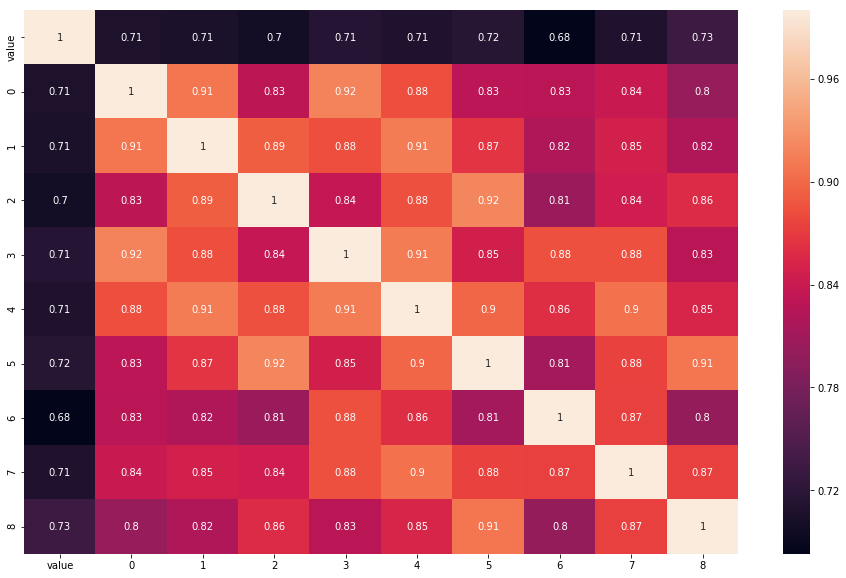

In [0]:
df2=pd.concat([y_data, x_data], axis=1)
plt.figure(figsize=(16, 10))
sns.heatmap(df2.corr(),annot=True)

<Figure size 1152x720 with 0 Axes>

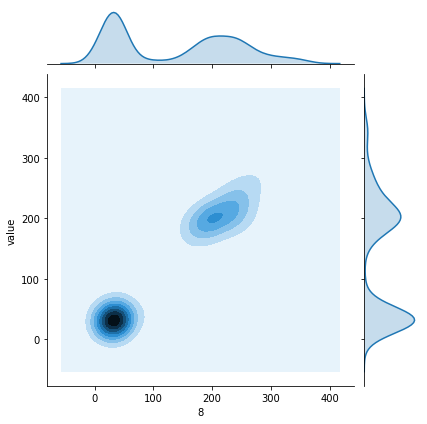

In [0]:
plt.figure(figsize=(16, 10))
ax=sns.jointplot("8", "value", data=df2, kind="kde",)

In [0]:
for column in df2.columns:
  df2["dif_"+column]=df2[column]-df2["value"]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]<180]
  df2["dif_"+column]=df2["dif_"+column][df2["dif_"+column]>-180]
df2.iloc[:,11:21].describe()

,dif_0,dif_1,dif_2,dif_3,dif_4,dif_5,dif_6,dif_7,dif_8
count,6033.000000,6033.000000,6029.000000,6052.000000,6049.000000,6057.000000,6014.000000,6050.000000,6090.000000
mean,5.961879,8.723292,9.120386,3.913683,6.047760,7.600721,3.747512,4.865107,6.792479
std,35.895685,34.820663,34.820085,35.267129,34.164025,34.117626,36.769900,33.728664,34.015931
min,-179.629589,-178.073966,-179.813946,-179.861431,-179.970993,-179.619433,-179.950232,-178.679962,-179.753494
25%,-11.520634,-8.499664,-7.753265,-12.006222,-9.557659,-8.382360,-12.447392,-9.839115,-8.273941
50%,-0.341904,4.015457,5.135529,-0.534889,2.134327,4.378483,0.260859,2.696186,4.289527
75%,17.463917,21.035599,21.009415,14.359853,16.896744,19.926071,14.897621,15.670879,17.768241
max,175.105438,179.692352,178.805801,179.963531,178.245880,178.165710,179.437714,179.056046,177.028763


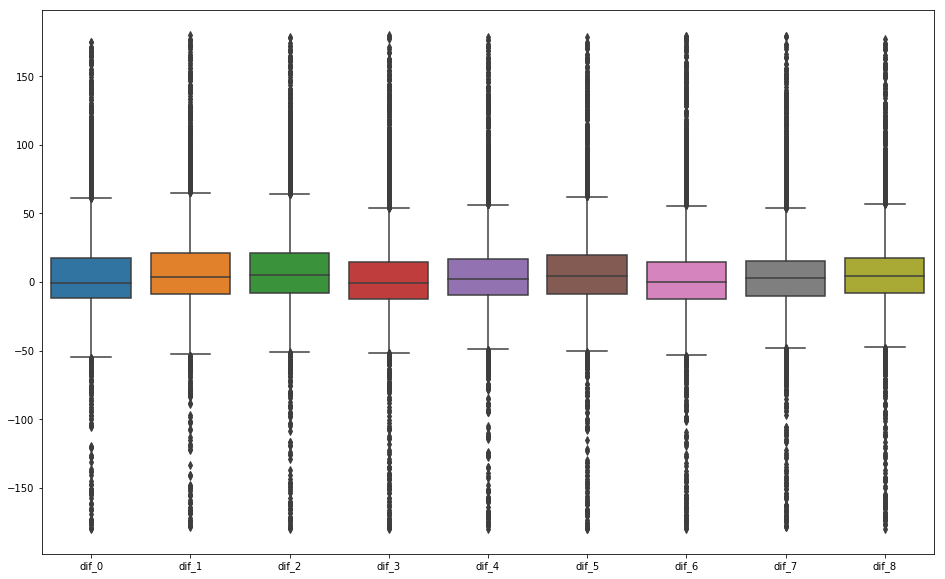

In [0]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=df2.iloc[:,11:21])
  